Сегодня мы узнаем как работают популярные методы xgboost, lightgbm, catboost.

## XGBoost

### Теория

XGBoost стал широко используемым и действительно популярным инструментом среди конкурентов Kaggle и специалистов по обработке данных в промышленности, так как он прошел боевые испытания для работы на крупномасштабных задачах. Это очень гибкий и универсальный инструмент, который может работать с большинством задач регрессии, классификации и ранжирования, а также с пользовательскими целевыми функциями. Как программное обеспечение с открытым исходным кодом, оно легко доступно и может использоваться на различных платформах и интерфейсах.

Его название расшифровывается как eXtreme Gradient Boosting, он был разработан Тианки Ченом и теперь является частью более широкой коллекции библиотек с открытым исходным кодом, разработанной сообществом распределенного машинного обучения (DMLC). XGBoost - это масштабируемая и точная реализация моделей градиентного бустинга, которая доказала, что расширяет пределы вычислительной мощности для алгоритмов усиленных деревьев, поскольку она была построена и разработана с целью повышения производительности модели и скорости вычислений. В частности, он был разработан для использования каждого бита памяти и аппаратных ресурсов для алгоритмов увеличения дерева.

Реализация XGBoost предлагает несколько расширенных функций для настройки модели, вычислительной среды и улучшения алгоритмов. Он способен выполнять три основных формы повышения градиента (Gradient Boosting (GB), Stochastic GB и Regularized GB) и достаточно надежен, чтобы поддерживать точную настройку и добавление параметров регуляризации. 

С точки зрения системы, переносимость и гибкость библиотеки позволяют использовать широкий спектр вычислительных сред, например распараллеливание для построения дерева по нескольким ядрам ЦП, распределенные вычисления для больших моделей вычисления вне ядра, и оптимизация кэша для улучшения использования оборудования и повышения эффективности.

Алгоритм был разработан для эффективного сокращения времени вычислений и распределения оптимального использования ресурсов памяти. Важные функции реализации включают обработку пропущенных значений (Sparse Aware), структуру блоков для поддержки распараллеливания при построении дерева и возможность подгонки и ускорения новых данных, добавленных в обученную модель (продолжение обучения).

**Целевая функция:**

<img src="https://miro.medium.com/max/1400/1*cU3rKmPvGZa3gzAZ3tzKnQ.png" width=700>

**Напоминание о линейной аппроксимации Тейлора**

<img src="https://miro.medium.com/max/654/1*6UcPRLfQAMd5qMC8L34C9g.png" width=300>

Нам нужно преобразовать исходную целевую функцию в функцию в евклидовой области, чтобы иметь возможность использовать традиционные методы оптимизации.

<img src="https://miro.medium.com/max/544/1*SVCB9qE7bE47jy0csuVYAQ.png" width=300>

Фишка здесь в том, что мы можем преобразовать функцию f(x) в простейшую функцию от Δx вокруг определенной точки a, используя теорему Тейлора.

Обратите внимание, что целевая функция должна быть дифференцируемой. В нашем случае f(x) - это функция потерь l, в то время как a - это предсказанное значение предыдущего шага (t-1), а Δx - это новый ученик, который нам нужно добавить на шаге t.

Используя вышеизложенное на каждой итерации t, мы можем записать целевую функцию (функцию потерь) как простую функцию нового добавленного учащегося и, таким образом, применить методы оптимизации евклидова пространства.

Как мы уже говорили, a - это прогноз на шаге (t-1), а (x-a) - это новый ученик, которого нам нужно добавить на шаге (t), чтобы жадно минимизировать цель.

Итак, если мы решим использовать приближение Тейлора второго порядка, мы имеем:

$$
\begin{array}{c}
f(x) \approx f(a)+f^{\prime}(a)(x-a)+\frac{1}{2} f^{\prime \prime}(a)(x-a)^{2} \\
\mathcal{L}^{(t)} \simeq \sum_{i=1}^{n}\left[l\left(y_{i}, \hat{y}^{(t-1)}\right)+g_{i} f_{t}\left(\mathbf{x}_{i}\right)+\frac{1}{2} h_{i} f_{t}^{2}\left(\mathbf{x}_{i}\right)\right]+\Omega\left(f_{t}\right)
\end{array}
$$

$$
g_{i}=\partial_{\hat{y}^{(t-1)}} l\left(y_{i}, \hat{y}^{(t-1)}\right) \text { and } h_{i}=\partial_{\hat{y}^{(t-1)}}^{2} l\left(y_{i}, \hat{y}^{(t-1)}\right)
$$


$$
\tilde{\mathcal{L}}^{(t)}=\sum_{i=1}^{n}\left[g_{i} f_{t}\left(\mathbf{x}_{i}\right)+\frac{1}{2} h_{i} f_{t}^{2}\left(\mathbf{x}_{i}\right)\right]+\Omega\left(f_{t}\right)
$$

Вышеупомянутая функция представляет собой сумму простых квадратичных функций одной переменной и может быть минимизирована с помощью известных методов, поэтому наша следующая цель - найти ученика, который минимизирует функцию потерь на итерации $t$.
$$
\operatorname{argmin}_{x} G x+\frac{1}{2} H x^{2}=-\frac{G}{H}, H>0 \quad \min _{x} G x+\frac{1}{2} H x^{2}=-\frac{1}{2} \frac{G^{2}}{H}
$$



Структура дерева-ученика для скоринговой функции q:
$$
\tilde{\mathcal{L}}^{(t)}(q)=-\frac{1}{2} \sum_{j=1}^{T} \frac{\frac{\left(\sum_{i \in I_{j}} g_{i}\right)^{2}}{\sum_{i \in I_{j}} h_{i}+\lambda}} + \gamma T
$$

Обратите внимание, что приведенная выше функция оценки качества возвращает минимальное значение потерь для данного дерева, что означает, что исходная функция потерь оценивается с использованием оптимальных значений веса. Итак, для любой данной древовидной структуры у нас есть способ вычислить оптимальные веса в листьях.

На практике, чтобы подготовить ученика, мы делаем следующее:
* Начинаем с одного корня (содержит все обучающие примеры)
* Перебираем все функции и значения для каждой функции и оцените каждое возможное уменьшение разделенных потерь
* Прирост для лучшего разделения должен быть положительным (и параметр> min_split_gain), иначе мы должны прекратить рост ветви.
* Вышеупомянутый алгоритм называется «точным жадным алгоритмом», и его сложность составляет O (n * m), где n - количество обучающих выборок, а m - размерность признаков.


Про алгоритм для деревьев для бустинга рекомендуем почитать [вот тут](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

### Пример применения

In [ ]:
# ! pip install xgboost

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

Давайте попробуем запустить модель для классификации на датасете для индийцев пима. Надо предсказать будет ли у у людей диабет в течение пяти лет. Описание датасета:

* Pregnancies – количество беременностей;
* Glucose – концентрация глюкозы в плазме через 2 часа в пероральном тесте на толерантность к глюкозе;
* BloodPressure – диастолическое артериальное давление (мм рт. ст.);
* SkinThickness – толщина кожной складки трицепса (мм);
* Insulin – 2-часовой сывороточный инсулин (мЕд / мл);
* BMI – индекс массы тела (вес в кг / (рост в м) ^ 2);
* DiabetesPedigreeFunction – диабетическая родословная функция;
* Age – возраст (лет);
* Class – целевая переменная (1: положительный результат тестирования на диабет, 0: отрицательный результат тестирования на диабет).

In [ ]:
id_ = '17eEQ5KAow5CNpg8c0Iy_Q8JyQwttDPSn'
url = f'https://drive.google.com/uc?export=download&id={id}'

df = pd.read_csv(
    #'pima-indians-diabetes.csv',
    url,
                 header=None,
                 names=[
                     'Pregnancies', 'Glucose', 'BloodPressure',
                     'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age', 'Class'
                 ])
df.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Class
0            6      148             72  ...                     0.627   50      1
1            1       85             66  ...                     0.351   31      0
2            8      183             64  ...                     0.672   32      1
3            1       89             66  ...                     0.167   21      0
4            0      137             40  ...                     2.288   33      1

[5 rows x 9 columns]

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  ...         Age       Class
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [ ]:
y = df['Class'].values
X = df.drop('Class', axis=1).values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7575757575757576

### Параметры XGBoost

Общие параметры были разделены авторами XGBoost на 3 категории:

* Общие параметры (General Parameters): управление общим функционированием
* Параметры бустера (Booster Parameters): ведите индивидуальный бустер (дерево / регресс) на каждом этапе
* Параметры задачи обучения (Learning Task Parameters): руководство выполненной оптимизацией

#### Общие параметры

Ниже приведены некоторые общие параметры. Они определяют общую функциональность XGBoost.

1. booster [default=gbtree]

Выберите тип модели для запуска на каждой итерации. Имеет 2 варианта:
* gbtree: древовидные модели
* gblinear: линейные модели


2. silent [default=0]

Отвечает за печать текущих сообщений не печатаются (1 – тихий режим активирован, сообщения не печатаются, 0 – наоборот). Как правило, лучше оставить 0, поскольку сообщения могут помочь в понимании модели.

2. nthread [по умолчанию максимальное количество доступных потоков, если не установлено]

Это используется для параллельной обработки, поэтому в данном параметре необходимо указать количество ядер в системе. Если вы хотите работать на всех ядрах, значение вводить не нужно, алгоритм определит автоматически.

#### Параметры бустера

Как было рассмотрено выше, есть 2 типа бустеров: древовидные и линейные. Ниже мы рассмотрим древовидные, тк они обычно работают лучше линейных.

1. eta [default=0.3]

Аналогично скорости обучения в GBM, этот параметр делает модель более устойчивой за счет уменьшения веса на каждом шаге. Обычные конечные значения: 0,01-0,2.

2. min_child_weight [default=1]

Определяет минимальную сумму весов всех наблюдений, необходимых для ребенка. Это похоже на min_child_leaf в GBM, но не совсем. Это относится к минимальной «сумме весов» наблюдений, в то время как GBM имеет минимальное «количество наблюдений».

Используется для контроля переобучения. Более высокие значения не позволяют модели изучать отношения, которые могут быть очень специфичными для конкретной выборки, выбранной для дерева. Слишком высокие значения могут привести к недостаточной подгонке, поэтому его следует настраивать с помощью CV.

3. max_depth [default=6]

Максимальная глубина дерева такая же. Используется для контроля чрезмерной подгонки, поскольку более высокая глубина позволяет модели изучать отношения, очень специфичные для конкретного наблюдения. Настраивается с помощью CV. Типичные значения: 3-10.

4. max_leaf_nodes

Максимальное количество конечных узлов или листьев в дереве. Может быть определено вместо max_depth. Поскольку создаются двоичные деревья, при глубине $n$ можно получить максимум $2^n$ листьев. Если это определено, то будет игнорироваться max_depth.

5. gamma [default=0]

Узел разделяется только тогда, когда результирующее разбиение дает положительное уменьшение функции потерь. Гамма определяет минимальное сокращение потерь, необходимое для разделения.

Делает алгоритм консервативным. Значения могут варьироваться в зависимости от функции потерь и должны быть настроены.

6. max_delta_step [default=0]

На максимальном шаге дельты мы допускаем оценку веса каждого дерева. Если значение установлено на 0, это означает, что ограничений нет. Если для него установлено положительное значение, это может помочь сделать шаг обновления более консервативным.

Обычно этот параметр не нужен, но он может помочь в логистической регрессии, когда класс крайне несбалансирован. Обычно это почти не используется, но при желании вы можете продолжить изучение.

7. subsample [default=1]

То же, что и подвыборка GBM. Обозначает долю наблюдений, которые будут случайными выборками для каждого дерева. Меньшие значения делают алгоритм более консервативным и предотвращают переобучение, но слишком маленькие значения могут привести к недоподборке. Типичные значения: 0,5-1

8. colsample_bytree [default=1]

Аналогично max_features в GBM. Обозначает долю столбцов, которые будут случайными выборками для каждого дерева. Типичные значения: 0,5-1

9. colsample_bylevel [default=1]

Обозначает долю подвыборки столбцов для каждого разделения на каждом уровне. Зачастую `subsample` и `colsample_bytree` сделают эту работу за вас. но вы можете исследовать дальше, если чувствуете это.

10. lambda [default=1]

Член регуляризации L2 для весов (аналог регрессии Риджа)& Это используется для обработки части регуляризации XGBoost. Хотя многие не используют его часто, его следует изучить, чтобы уменьшить переобучение.

11. alpha [default=0]

Член регуляризации L1 по весу (аналог регрессии Лассо). Может использоваться в случае очень высокой размерности, чтобы алгоритм работал быстрее при реализации

12. scale_pos_weight [default=1]

Значение больше 0 следует использовать в случае дисбаланса высокого класса, поскольку это способствует более быстрой сходимости.

#### Параметры задачи обучения

Эти параметры используются для определения цели оптимизации – метрики, рассчитываемой на каждом шаге.

1. objective [default=reg:linear]

Это определяет функцию потерь, которую необходимо минимизировать. Чаще всего используются следующие значения:
* binary:logistic – логистическая регрессия для бинарной классификации, возвращает прогнозируемую вероятность (не класс);
* multi:softmax – многоклассовая классификация с использованием цели softmax, возвращает предсказанный класс (не вероятности). Вам также необходимо установить дополнительный параметр `num_class` (количество классов), определяющий количество уникальных классов;
* multi:softprob – то же самое, что и softmax, но возвращает прогнозируемую вероятность принадлежности каждой точки данных к каждому классу.


2. eval_metric [default according to objective]

Метрика, которая будет использоваться для данных проверки. Значения по умолчанию: rmse для регрессии и ошибка для классификации. Типичные значения:
* rmse – корень из среднеквадратичной ошибки, root mean square error
* mae – средняя абсолютная ошибка, mean absolute error
* logloss – отрицательная логарифмическая вероятность, negative log-likelihood
* error – частота ошибок двоичной классификации (порог 0,5), binary classification error rate
* merror – частота ошибок многоклассовой классификации, multiclass classification error rate
* mlogloss – многоклассовый лог-лосс, multiclass logloss
* auc – площадь под roc-кривой, area under the curve


3. seed [default=0]

Инициализирует генератор случайных чисел. Может использоваться для получения воспроизводимых результатов, а также для настройки параметров.


Более подробно посмотреть возможные параметры можно [по ссылке](https://xgboost.readthedocs.io/en/latest/parameter.html).

## lightGBM

### Теория

lightGBM – тоже бустинг над решающими деревьями, однако, немного отличающийся от других пакетов.

#### Оптимизация скорости и использования памяти

Многие инструменты повышения уровня используют алгоритмы предварительной сортировк (например, алгоритм по умолчанию в xgboost) для изучения дерева решений. Это простое решение, но его нелегко оптимизировать.

LightGBM использует алгоритмы на основе гистограмм, которые объединяют непрерывные значения признаков (атрибутов) в отдельные интервалы. Это ускоряет обучение и снижает использование памяти. К преимуществам алгоритмов на основе гистограмм можно отнести следующее:

1. Снижена стоимость расчета выигрыша для каждого сплита


* Алгоритмы на основе предварительной сортировки имеют временную сложность $O(n)$ ($n$ – количество наблюдений в выборке)
* Вычисление гистограммы имеет временную сложность $O(n)$, но это включает только быструю операцию суммирования. После построения гистограммы алгоритм на основе гистограммы имеет временную сложность $O(m)$, m - число интервалов в гистограмме, то есть m намного меньше, чем n.


2. Используется вычитание гистограммы для дальнейшего ускорения


* Чтобы получить гистограммы одного листа в двоичном дереве, используйте вычитание гистограммы его родителя и его соседа.
* Поэтому ему нужно построить гистограммы только для одного листа (с меньшим $n$, чем у его соседа). Затем он может получать гистограммы своего соседа путем вычитания гистограммы с небольшими затратами ($O(m)$)


3. Уменьшено использование памяти


* Заменяет непрерывные значения дискретными ячейками. Если $m$ мало, можно использовать небольшой тип данных, например uint8_t, для хранения данных обучения
* Нет необходимости хранить дополнительную информацию для предварительной сортировки значений функций


4. Снижение затрат на коммуникацию при параллельном обучении

#### Оптимизация точности

##### Листовой рост деревьев

Большинство алгоритмов обучения деревьям решений выращивают деревья по уровням (глубине), как показано на следующем рисунке:

<img src="https://lightgbm.readthedocs.io/en/latest/_images/level-wise.png" width=700>

LightGBM выращивает деревья по листву (сначала лучше всего). Он выберет для роста лист с максимальной потерей дельты. Удерживая фиксированные значения в листе, листовые алгоритмы, как правило, приводят к меньшим потерям, чем уровневые алгоритмы.

Листовое изображение может вызвать чрезмерную подгонку, когда набор данных маленький, поэтому LightGBM включает параметр `max_depth` для ограничения глубины дерева. Однако деревья по-прежнему растут по листу, даже если указано `max_depth`.

<img src="https://lightgbm.readthedocs.io/en/latest/_images/leaf-wise.png" width=700>

##### Оптимальное разделение по категориальным признакам

Обычно категориальные функции представляют с помощью однократного кодирования, но этот подход неоптимален для изучающих дерево. В частности, для категориальных функций с высокой мощностью, дерево, построенное на основе горячих функций, имеет тенденцию быть несбалансированным и должно расти очень глубоко для достижения хорошей точности.

Вместо однократного кодирования оптимальным решением является разделение по категориальному признаку путем разделения его категорий на 2 подмножества. Если объект имеет $k$ категорий, существует $2^{(k-1)} - 1$ возможных разделов. Но есть эффективное решение для деревьев регрессии. Для поиска оптимального раздела требуется около $O(k * log (k))$.

Основная идея состоит в том, чтобы отсортировать категории в соответствии с целями тренировки на каждой группе. В частности, LightGBM сортирует гистограмму (для категориального признака) в соответствии с ее накопленными значениями (sum_gradient / sum_hessian), а затем находит лучшее разделение на отсортированной гистограмме.

#### Оптимизация в параллельном обучении

LightGBM предоставляет следующие алгоритмы параллельного обучения.

##### Работа с признаками

**Традиционный алгоритм**

Параллелизация работы с признаками направлена на поиск наилучшего разбиения в дереве решений. Обычный алгоритм выглядит примерно так:

* Разделите данные по вертикали (разные машины имеют разный набор признаков).
* Воркеры находят локальную лучшую точку разбиения {feature, threshold} на локальном наборе признаков.
* Сравниваются между собой лучшие сплиты воркеров и выбираются лучшие.
* Воркер с наилучшим разбиением выполняет разбиение, а затем результаты разбиения отправляются другим воркерам.
* Остальные воркеры разделяют данные согласно полученным данным.

**Недостатки традиционной алгоритма:**

* Имеет накладные расходы на вычисления, поскольку не может ускорить «разбиение», временная сложность которого равна $O(n)$. Таким образом, параллельное выполнение функций не может хорошо ускориться при большом $n$ ($n$, как и раньше, число строк в датасете).
* Требуется передача результата разделения, который стоит около $O(n/8)$ (один бит для одних данных).

**Параллелизация работы с признаками в LightGBM**

Поскольку параллельное выполнение функций не может быстро ускориться при большом $n$, мы внесем небольшое изменение: вместо вертикального разделения данных каждый воркер хранит все данные. Таким образом, LightGBM не нуждается в обмене данными для разделения данных, поскольку каждый воркер знает, как разделить данные. И $n$ не будет больше, поэтому разумно хранить полные данные на каждой машине.

* Воркеры находят локальную лучшую точку разбиения {feature, threshold} на локальном наборе признаков.
* Сравниваются между собой лучшие сплиты воркеров и выбираются лучшие.
* Выбирается лучшее разбиение.

Однако этот параллельный алгоритм по-прежнему страдает от накладных расходов на вычисления для «разделения», когда $n$ велико. Поэтому при большом $n$ лучше использовать параллельные данные.

##### Работа с данными

**Традиционный алгоритм**

Параллелизация работы с данными направлена на распараллеливание всего процесса принятия решений. Процедура параллельной обработки данных:

* Разделите данные по горизонтали.
* Воркеры используют локальные данные для построения локальных гистограмм.
* Объедините глобальные гистограммы из всех локальных гистограмм.
* Найдите лучшее разбиение из объединенных глобальных гистограмм, затем выполните разбиение.

**Недостатки традиционного алгоритма:**

* Высокая стоимость связи. При использовании алгоритма связи от точки к точке стоимость связи для одной машины составляет около $O (\textit{машина} * \textit{признак} * \textit{отрезок (из гистограммы)}$). При использовании алгоритма коллективной связи (например, «All Reduce») стоимость связи составляет около $O(2 * \textit{признак} * \textit{отрезок (из гистограммы)}$.

**Параллелизация работы с данными в LightGBM**

Мы снижаем стоимость передачи данных параллельно в LightGBM:

Вместо пункта «Объединить глобальные гистограммы из всех локальных гистограмм» LightGBM использует уменьшение разброса для объединения гистограмм разных (не пересекающихся) признаков для разных воркерах. Затем воркеры находят лучшее локальное разбиение на объединенных локальных гистограммах и синхронизируют глобальное лучшее разбиение.

Как упоминалось выше, LightGBM использует вычитание гистограммы для ускорения обучения. Исходя из этого, мы можем передавать гистограммы только для одного листа, а также получать гистограммы его соседей путем вычитания.

Учитывая все обстоятельства, параллельные данные в LightGBM имеют временную сложность $O(0,5 * \textit{признак} * \textit{отрезок (из гистограммы)}$.

### Пример применения

In [ ]:
# !pip install lightgbm

In [2]:
import lightgbm as lgb

Рекомендуем посмотреть документацию [здесь](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html).

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 1500        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor


In [ ]:
def plot_tree_2(num_leaves):
    reg_tree= lgb.LGBMRegressor(
        num_leaves=num_leaves, n_estimators=1, 
        learning_rate=1, min_child_weight=0, min_child_samples=1)

    reg_tree.fit(X_train, y_train)
    reg_tree_pred = reg_tree.predict(X_test)

    plt.plot(X_test, f(X_test), c="b", label='true line')
    plt.scatter(X_train, y_train, c="r", s=2, alpha=0.1, label='x,y')
    plt.plot(X_test, reg_tree_pred, "g", lw=2, label='prediction')
    plt.xlim([-5, 5])
    plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
    plt.legend()

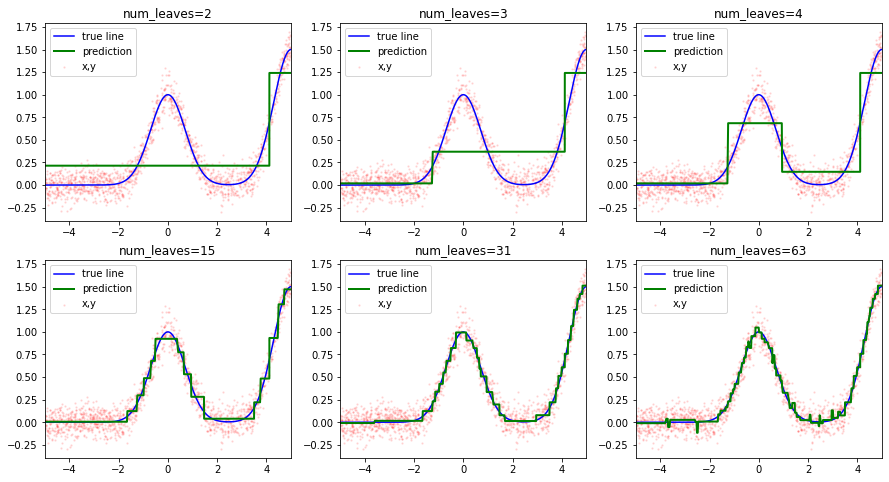

In [ ]:
plt.figure(figsize=(15,8))
for i,num_leaves in enumerate([2,3,4,15,31,63]):
    plt.subplot(2,3,i+1)
    plot_tree_2(num_leaves=num_leaves)
    plt.title(f'num_leaves={num_leaves}')
plt.show()

### Параметры lightGBM

Очень похожи на XGBoost. Список с пояснениями можно найти [здесь](https://lightgbm.readthedocs.io/en/latest/Parameters.html).

## CatBoost

### Теория

Цель обучения - выбрать модель в зависимости от набора признаков, которая наилучшим образом решает данную проблему (регрессия, классификация или мультиклассификация) для любого входного объекта. Эта модель находится с помощью набора обучающих данных, который представляет собой набор объектов с известными признаками и значениями целевой переменной. Точность проверяется на тестовом наборе данных, который содержит данные в том же формате, что и набор данных для обучения, но он используется только для оценки качества обучения (не используется для обучения).

CatBoost основан на деревьях решений с градиентным бустингом. Во время обучения последовательно строится набор деревьев решений. Каждое последующее дерево строится с меньшими потерями по сравнению с предыдущими деревьями.

Количество деревьев контролируется стартовыми параметрами. Чтобы предотвратить переобучение, используйте детектор переобучения (подробнее о его работе можно прочитать [здесь](https://catboost.ai/docs/concepts/overfitting-detector.html)). Когда он срабатывает, деревья перестают строиться.

Этапы построения одиночного дерева:
* Предварительный расчет разбиений.
* (Необязательно) Преобразование категориальных признаков в числовые.
* (Необязательно) Преобразование текстовых признаков в числовые признаки.
* Выбор древовидной структуры. На этот этап влияют установленные параметры Bootstrap.
* Расчет значений в листьях.

### Основные отличия CatBoost

**Симметричные деревья**

<img src="https://cdn-ak.f.st-hatena.com/images/fotolife/c/copypaste_ds/20190905/20190905121126.png" width=500>

**Поддержка категориальных признаков**

* Подсчитываются статистики по категориям и категориям + значениям лейбла
* Используется несколько перестановок
* Комбинации признаков строятся жадным перебором
* Применяется one-hot кодирование

Пример кодировки находится [здесь](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html).

**Бустинг**

В классическом бустинге подсчет значений в листе происходит так:
$$leafValue = \sum_{i=1}^N \frac{g(approx(i), (target(i))}{n}$$

В ordered (упорядоченном) бустинге формула немного меняется: 
$$leafValue = \sum_{i=1}^{doc} \frac{g(approx(i), (target(i))}{\textit{docs in the past}}$$

### Пример применения

In [ ]:
!pip3 install catboost
# !pip install shap
!pip3 install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 11.5 MB 63 kB/s  eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3 -m pip install --upgrade pip' command.


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3 -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import datasets
from catboost import *

**Данные**

Вам предоставлены данные о сотрудниках Amazon. Эти данные состоят из реальных исторических данных, собранных за 2010 и 2011 годы. Сотрудникам вручную разрешается или запрещается доступ к ресурсам с течением времени. Вы должны создать алгоритм, способный учиться на этих исторических данных, чтобы прогнозировать одобрение / отказ для невидимой группы сотрудников.

* ACTION – целевая переменная (1 – сотруднику дали доступ, 0 – отказали)
* RESOURCE – ID ресурса, к которому можно получить доступ
* MGR_ID – ID менеджера сотрудника, у сотрудника может быть только один менеджер
* ROLE_ROLLUP_1 – идентификатор роли в компании-1 (например, US Engineering)
* ROLE_ROLLUP_2 – идентификатор роли в компании-2 (например, US Retail)
* ROLE_DEPTNAME – описание отдела компании (например, Retail)
* ROLE_TITLE – описание бизнес-названия роли компании (например, Senior Engineering Retail Manager)
* ROLE_FAMILY_DESC – расширенное описание семейства ролей компании (например, Retail Manager, Software Engineering)
* ROLE_FAMILY – описание семейства ролей компании (например, Retail Manager)
* ROLE_CODE	– код роли в компании; этот код уникален для каждой роли (например, Manager)

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
train_df, test_df = catboost.datasets.amazon()
train_df.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [8]:
dataset_dir = './amazon'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

train_df.to_csv(os.path.join(dataset_dir, 'train.csv'), index=False)
test_df.to_csv(os.path.join(dataset_dir, 'test.csv'), index=False)

In [9]:
y = train_df.ACTION
X = train_df.drop('ACTION', axis=1)

In [10]:
# объявим категориальные признаки
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [11]:
dict(list(enumerate(train_df.columns)))

{0: 'ACTION',
 1: 'RESOURCE',
 2: 'MGR_ID',
 3: 'ROLE_ROLLUP_1',
 4: 'ROLE_ROLLUP_2',
 5: 'ROLE_DEPTNAME',
 6: 'ROLE_TITLE',
 7: 'ROLE_FAMILY_DESC',
 8: 'ROLE_FAMILY',
 9: 'ROLE_CODE'}

In [12]:
from catboost.utils import create_cd
feature_names = dict(list(enumerate(train_df.keys()[1:])))
    
create_cd(
    label=0,
    cat_features=list(range(1, train_df.shape[1])),
    feature_names=feature_names,
    output_path=os.path.join(dataset_dir, 'train.cd')
)

Теперь мы можем создать объект Pool. Этот тип используется для наборов данных в CatBoost. Вы также можете использовать массив numpy или фрейм данных. Работа с классом Pool - самый эффективный способ с точки зрения памяти и скорости. Мы рекомендуем создавать пул из файла, если у вас есть данные на диске, или из FeaturesData, если вы используете numpy.

Самый быстрый способ создать пул - создать его из матрицы numpy. Этот способ следует использовать, если вам нужны быстрые прогнозы или самый быстрый способ загрузить данные в python.

In [13]:
pool1 = Pool(data=X, label=y, cat_features=cat_features)

pool2 = Pool(
    data=os.path.join(dataset_dir, 'train.csv'), 
    delimiter=',', 
    column_description=os.path.join(dataset_dir, 'train.cd'),
    has_header=True
)

pool3 = Pool(data=X, cat_features=cat_features)

X_prepared = X.values.astype(str).astype(object)
# Категориальные признаки в catboost должны иметь тип str

pool4 = Pool(
    data=FeaturesData(cat_feature_data=X_prepared, cat_feature_names=list(X)),
    label=y.values
)

print('Dataset shape')
print('dataset 1:' + str(pool1.shape) + '\ndataset 2:' + str(pool2.shape) + 
      '\ndataset 3:' + str(pool3.shape) + '\ndataset 4: ' + str(pool4.shape))

print('\n')
print('Column names')
print('dataset 1:')
print(pool1.get_feature_names()) 
print('\ndataset 2:')
print(pool2.get_feature_names())
print('\ndataset 3:')
print(pool3.get_feature_names())
print('\ndataset 4:')
print(pool4.get_feature_names())

Dataset shape
dataset 1:(32769, 9)
dataset 2:(32769, 9)
dataset 3:(32769, 9)
dataset 4: (32769, 9)


Column names
dataset 1:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 2:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 3:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']

dataset 4:
['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

Обучим первую модель.

In [15]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, random_seed=0, learning_rate=0.7)
model.fit(X_train,
          y_train,
          cat_features=cat_features,
          eval_set=(X_validation, y_validation),
          #logging_level='Silent'
          verbose=20
          )
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.3258696	test: 0.3240474	best: 0.3240474 (0)	total: 63.9ms	remaining: 6.33s
20:	learn: 0.1707336	test: 0.1599301	best: 0.1598412 (19)	total: 180ms	remaining: 679ms
40:	learn: 0.1650154	test: 0.1587489	best: 0.1587489 (40)	total: 294ms	remaining: 423ms
60:	learn: 0.1602363	test: 0.1577662	best: 0.1577246 (52)	total: 432ms	remaining: 276ms
80:	learn: 0.1575914	test: 0.1583099	best: 0.1577246 (52)	total: 638ms	remaining: 150ms
99:	learn: 0.1546051	test: 0.1583293	best: 0.1577246 (52)	total: 779ms	remaining: 0us

bestTest = 0.1577246305
bestIteration = 52

Shrink model to first 53 iterations.
Model is fitted: True
Model params:
{'iterations': 100, 'learning_rate': 0.7, 'random_seed': 0}


Вы можете увидеть в стандартном выводе значения функции потерь на каждой итерации или на каждой k-й итерации. Вы также можете увидеть, сколько времени прошло с начала тренировки и сколько времени осталось.

In [16]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
    verbose=3
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.434276
0:	learn: 0.4254575	test: 0.4239191	best: 0.4239191 (0)	total: 9.13ms	remaining: 128ms
3:	learn: 0.2341798	test: 0.2315195	best: 0.2315195 (3)	total: 35.4ms	remaining: 97.4ms
6:	learn: 0.1897462	test: 0.1801328	best: 0.1801328 (6)	total: 61.8ms	remaining: 70.7ms
9:	learn: 0.1805353	test: 0.1676350	best: 0.1676350 (9)	total: 84ms	remaining: 42ms
12:	learn: 0.1777267	test: 0.1642904	best: 0.1642904 (12)	total: 102ms	remaining: 15.7ms
14:	learn: 0.1755570	test: 0.1627501	best: 0.1627501 (14)	total: 113ms	remaining: 0us

bestTest = 0.1627500973
bestIteration = 14



Если вы не укажете random_seed, тогда random seed будет каждый раз устанавливать новое значение. После завершения обучения вы можете посмотреть значение заданного случайного начального числа. Если вы снова потренируетесь с этим random_seed, вы получите те же результаты.

In [17]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.434276
0:	learn: 0.4254575	test: 0.4239191	best: 0.4239191 (0)	total: 11.7ms	remaining: 164ms
1:	learn: 0.3179180	test: 0.3164277	best: 0.3164277 (1)	total: 19.1ms	remaining: 124ms
2:	learn: 0.2641395	test: 0.2624161	best: 0.2624161 (2)	total: 28.4ms	remaining: 113ms
3:	learn: 0.2341798	test: 0.2315195	best: 0.2315195 (3)	total: 39.3ms	remaining: 108ms
4:	learn: 0.2098367	test: 0.2033180	best: 0.2033180 (4)	total: 48ms	remaining: 96ms
5:	learn: 0.1980251	test: 0.1899174	best: 0.1899174 (5)	total: 54.1ms	remaining: 81.1ms
6:	learn: 0.1897462	test: 0.1801328	best: 0.1801328 (6)	total: 61ms	remaining: 69.8ms
7:	learn: 0.1853909	test: 0.1745719	best: 0.1745719 (7)	total: 68.1ms	remaining: 59.6ms
8:	learn: 0.1825535	test: 0.1708270	best: 0.1708270 (8)	total: 75.5ms	remaining: 50.3ms
9:	learn: 0.1805353	test: 0.1676350	best: 0.1676350 (9)	total: 82.4ms	remaining: 41.2ms
10:	learn: 0.1789171	test: 0.1651784	best: 0.1651784 (10)	total: 87.5ms	remaining: 31.8ms
11:	learn:

In [18]:
random_seed = model.random_seed_
print('Used random seed = ' + str(random_seed))
model = CatBoostClassifier(
    iterations=5,
    random_seed=random_seed
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Used random seed = 0
Learning rate set to 0.5
0:	learn: 0.3967366	test: 0.3950896	best: 0.3950896 (0)	total: 7.9ms	remaining: 31.6ms
1:	learn: 0.2941275	test: 0.2925750	best: 0.2925750 (1)	total: 13.6ms	remaining: 20.3ms
2:	learn: 0.2472126	test: 0.2453665	best: 0.2453665 (2)	total: 20.6ms	remaining: 13.7ms
3:	learn: 0.2219962	test: 0.2180716	best: 0.2180716 (3)	total: 30.9ms	remaining: 7.73ms
4:	learn: 0.2018652	test: 0.1945321	best: 0.1945321 (4)	total: 39.4ms	remaining: 0us

bestTest = 0.1945320687
bestIteration = 4



А еще с этой библиотекой очень удобно рисовать!

In [19]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.1,
    custom_loss=['Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Сравним несколько моделей:

In [20]:
model1 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=50,
    random_seed=64,
    train_dir='learning_rate_0.5'
)

model2 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=50,
    random_seed=64,
    train_dir='learning_rate_0.05'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=10
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=10
)

0:	learn: 0.3972443	test: 0.3958490	best: 0.3958490 (0)	total: 10.6ms	remaining: 519ms
10:	learn: 0.1786828	test: 0.1646876	best: 0.1646876 (10)	total: 74ms	remaining: 262ms
20:	learn: 0.1721037	test: 0.1600250	best: 0.1598748 (19)	total: 141ms	remaining: 194ms
30:	learn: 0.1689205	test: 0.1577794	best: 0.1577794 (30)	total: 195ms	remaining: 120ms
40:	learn: 0.1670458	test: 0.1575376	best: 0.1575376 (40)	total: 268ms	remaining: 58.8ms
49:	learn: 0.1647194	test: 0.1567791	best: 0.1566963 (47)	total: 318ms	remaining: 0us

bestTest = 0.1566962517
bestIteration = 47

Shrink model to first 48 iterations.
0:	learn: 0.6550994	test: 0.6549143	best: 0.6549143 (0)	total: 8.1ms	remaining: 397ms
10:	learn: 0.4176872	test: 0.4165343	best: 0.4165343 (10)	total: 65.1ms	remaining: 231ms
20:	learn: 0.3114356	test: 0.3097068	best: 0.3097068 (20)	total: 113ms	remaining: 155ms
30:	learn: 0.2577563	test: 0.2550672	best: 0.2550672 (30)	total: 186ms	remaining: 114ms
40:	learn: 0.2276042	test: 0.2238488	best:

In [21]:
from catboost import MetricVisualizer
MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.5']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Если набор данных проверки присутствует, то после обучения модель сжимается до ряда деревьев, когда она получает наилучшее значение метрики оценки в наборе данных проверки. По умолчанию метрика оценки является оптимизированной метрикой. Но вы можете установить метрику оценки на другую метрику. В приведенном ниже примере метрикой оценки является точность.

In [22]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
print('Количество деревьев: ' + str(model.tree_count_))

Количество деревьев: 84


Если вы не хотите, чтобы модель была сжата, вы можете установить `use_best_model=False`.

In [24]:
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
    eval_metric='Accuracy',
    use_best_model=False
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Посмотрим на применение кросс-валидации:

In [25]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [26]:
print(cv_data[0:4])

   iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.302364          0.003822            0.302517   
1           1           0.229614          0.010217            0.230600   
2           2           0.191320          0.007563            0.197406   
3           3           0.179553          0.008215            0.187570   

   train-Logloss-std  test-AUC-mean  test-AUC-std  
0           0.003228       0.527207      0.024999  
1           0.004250       0.620307      0.055999  
2           0.002225       0.786729      0.020757  
3           0.001331       0.808186      0.011560  


In [27]:
best_value = np.argmin(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 77.0000±0.0077 on step 77


Еще одна полезная фича библиотеки – overfitting detector. Обучим модель с ранней остановкой.

In [28]:
model_with_early_stop = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))